# Segmentation & Morphological Operations

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = './data/images' # Change this, according to your images' directory path

13. Segmentation - Thresholding

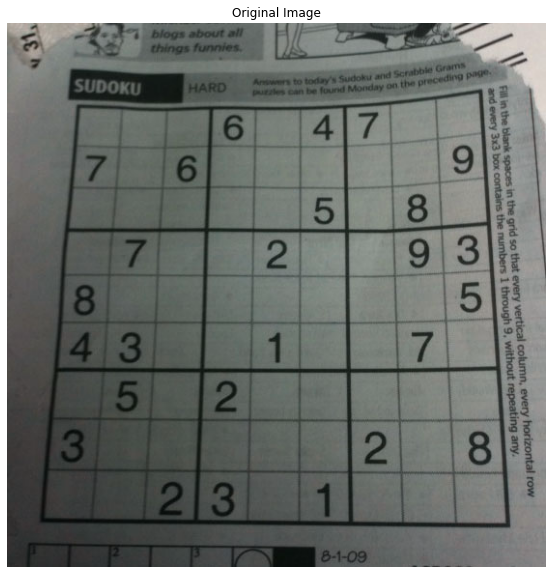

In [18]:
# Read the iamge
filename = 'sudoku.png'
img = cv2.imread(os.path.join(imagesDir, filename))   # Thresholding is done on grayscale images

# if image is not read properly, print error message and exit
if img is None:
    print("Could not read the image.")
else:
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

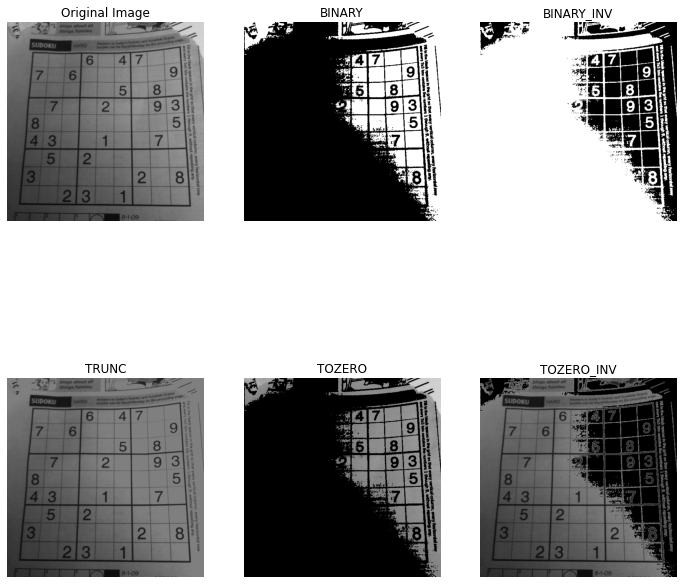

In [22]:
# Let's first compare the different simple thresholding methods
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

# Plot the results
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]

# set figure size
plt.rcParams["figure.figsize"] = (12, 12)
# plot the images
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis('off')

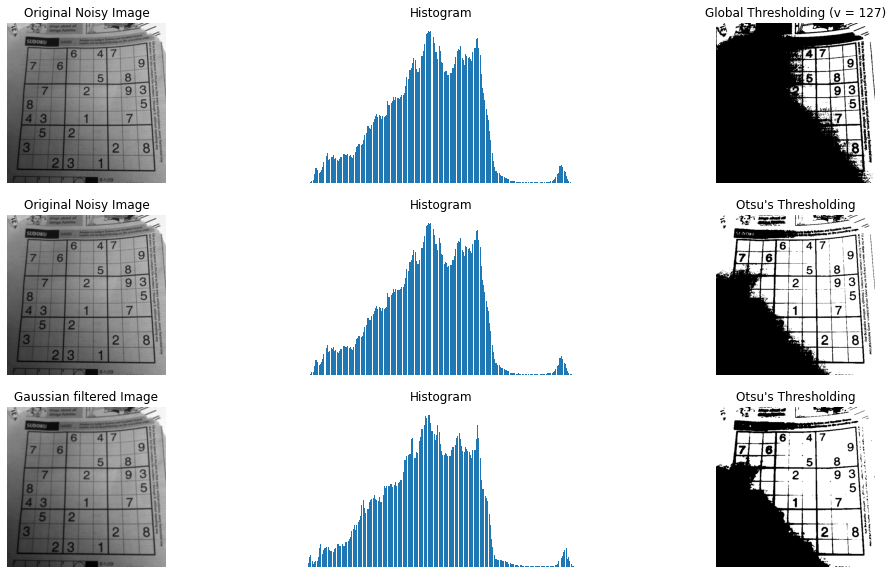

In [31]:
# In Global Thresholding, we used an arbitrary chosen value as threshold. Otsu's method avoids having to choose a value and determines it automatically.
# Essentially, it views the image as a histogram and tries to find an optimal threshold value that minimizes the intra-class variance. That is, a threshold value that splits the
# image into two parts with the least amount of variance between them.

# Otsu's thresholding
ret, otsuTh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering (5x5)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, otsuTh2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the results
titles = [
            'Original Noisy Image', "Histogram", 'Global Thresholding (v = 127)',
            'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
            'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"
        ]
images = [
            gray, 0, thresh1,
            gray, 0, otsuTh1,
            blur, 0, otsuTh2
        ]

# set figure size
plt.rcParams["figure.figsize"] = (18, 10)
# plot the images
for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3])
    plt.axis('off')

    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.axis('off')

    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], 'gray', vmin=0, vmax=255)
    plt.title(titles[i*3+2])
    plt.axis('off')


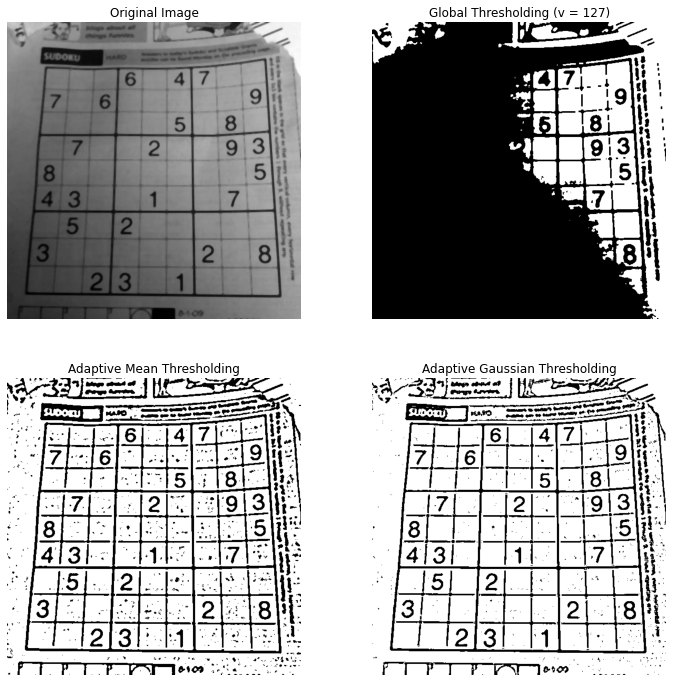

In [34]:
# Previously, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. 
# In that case, Adaptive Thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. 
# So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

# Adaptive Thresholding
# blockSize: size of a pixel neighborhood that is used to calculate a threshold value for the pixel
# C: constant subtracted from the mean or weighted mean
def adaptiveThresholding(img, blockSize, C):
    # Blurs the image to remove noise
    smoothImg = cv2.medianBlur(img, 5)

    # Global thresholding
    ret, th_global = cv2.threshold(smoothImg, 127, 255, cv2.THRESH_BINARY)

    # Adaptive thresholding
    # Adaptive Mean Thresholding
    th_adaptive1 = cv2.adaptiveThreshold(smoothImg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
    # Adaptive Gaussian Thresholding
    th_adaptive2 = cv2.adaptiveThreshold(smoothImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

    # Plot the results
    titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [smoothImg, th_global, th_adaptive1, th_adaptive2]

    # set figure size
    plt.rcParams["figure.figsize"] = (12, 12)
    # plot the images
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.axis('off')

adaptiveThresholding(gray, 11, 2)
